# Assignments: Cleaning Data

## 1. Data in Python Request

* Read in data from the Excel spreadsheet (Alarm Survey Data.xlsx) and put into a Pandas DataFrame
* Check the data type of each column
* Convert object columns into numeric or datetime columns, as needed

In [3]:
import pandas as pd

alarm_survey = pd.read_excel(r"C:\Users\TAJ\Desktop\Python Data Prep and ETA\Data\Alarm Survey Data.xlsx")

In [5]:
alarm_survey.head()

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
0,1,34,3.0,active,3.0,1,5 stars
1,2,31,3.0,light,3.0,3,3 stars
2,3,18,0.0,light_activity,4.0,1,1 stars
3,4,42,4.0,active,4.0,1,4 stars
4,5,30,1.0,light_activity,1.0,4,3 stars


In [7]:
alarm_survey.dtypes

survey_id               int64
age                     int64
number_of_children    float64
activity_level         object
sleep_quality         float64
number_of_snoozes       int64
alarm_rating           object
dtype: object

In [9]:
alarm_survey.alarm_rating = pd.to_numeric(alarm_survey.alarm_rating.str.replace(' stars',''))

In [11]:
alarm_survey.alarm_rating

0       5
1       3
2       1
3       4
4       3
       ..
6428    5
6429    4
6430    3
6431    3
6432    1
Name: alarm_rating, Length: 6433, dtype: int64

In [13]:
alarm_survey.number_of_children = alarm_survey.number_of_children.astype('int')

In [15]:
alarm_survey.head()

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
0,1,34,3,active,3.0,1,5
1,2,31,3,light,3.0,3,3
2,3,18,0,light_activity,4.0,1,1
3,4,42,4,active,4.0,1,4
4,5,30,1,light_activity,1.0,4,3


## 2. Missing Data Check

* Find any missing data
* Deal with the missing data

In [116]:
alarm_survey.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6299 entries, 0 to 6298
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   survey_id           6299 non-null   int64 
 1   age                 6299 non-null   int64 
 2   number_of_children  6299 non-null   int32 
 3   activity_level      6299 non-null   object
 4   sleep_quality       6299 non-null   object
 5   number_of_snoozes   6299 non-null   int64 
 6   alarm_rating        6299 non-null   int64 
dtypes: int32(1), int64(4), object(2)
memory usage: 369.1+ KB


In [32]:
alarm_survey[alarm_survey.isna().any(axis=1)]

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating


In [58]:
alarm_survey.sleep_quality.value_counts(dropna=False)

sleep_quality
5.0    2721
4.0    2261
3.0     997
2       351
1.0     103
Name: count, dtype: int64

In [118]:
import numpy as np

alarm_survey.sleep_quality = np.where(alarm_survey.sleep_quality.isna(),'Freshman', alarm_survey.sleep_quality)
alarm_survey


alarm_survey.sleep_quality = np.where(alarm_survey.sleep_quality == 'Freshman', 2, alarm_survey.sleep_quality)
alarm_survey

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
0,1,34,3,active,3.0,1,5
1,2,31,3,lightly active,3.0,3,3
2,3,18,0,lightly active,4.0,1,1
3,4,42,4,active,4.0,1,4
4,5,30,1,lightly active,1.0,4,3
...,...,...,...,...,...,...,...
6294,6295,28,0,lightly active,4.0,0,5
6295,6296,22,0,active,5.0,0,3
6296,6297,45,5,active,5.0,0,3
6297,6298,47,4,active,5.0,0,3


In [38]:
alarm_survey['sleep_quality']

0       3.0
1       3.0
2       4.0
3       4.0
4       1.0
       ... 
6428    5.0
6429    4.0
6430    5.0
6431    5.0
6432    4.0
Name: sleep_quality, Length: 6433, dtype: object

In [60]:
alarm_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   survey_id           6433 non-null   int64 
 1   age                 6433 non-null   int64 
 2   number_of_children  6433 non-null   int32 
 3   activity_level      6433 non-null   object
 4   sleep_quality       6433 non-null   object
 5   number_of_snoozes   6433 non-null   int64 
 6   alarm_rating        6433 non-null   int64 
dtypes: int32(1), int64(4), object(2)
memory usage: 326.8+ KB


## 3. Inconsistent Text & Typos Check

* Find any inconsistent text and typos
* Deal with the inconsistent text and typos

In [62]:
alarm_survey

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
0,1,34,3,active,3.0,1,5
1,2,31,3,light,3.0,3,3
2,3,18,0,light_activity,4.0,1,1
3,4,42,4,active,4.0,1,4
4,5,30,1,light_activity,1.0,4,3
...,...,...,...,...,...,...,...
6428,6362,27,2,active,5.0,0,5
6429,6363,31,1,light,4.0,0,4
6430,6364,26,0,lightly active,5.0,0,3
6431,6365,27,1,active,5.0,0,3


In [92]:
alarm_survey.activity_level.value_counts()

activity_level
lightly active    3314
active            2450
very active        669
Name: count, dtype: int64

In [66]:
alarm_survey.age.value_counts()

age
27    422
32    381
23    373
25    361
22    351
26    342
24    330
31    273
28    272
30    267
29    262
37    242
19    203
21    191
18    185
36    165
17    159
20    157
34    156
38    148
35    147
40    136
33    136
39    136
41    122
42    120
44     76
45     75
43     67
46     65
47     64
13     13
16     13
15     12
14     11
Name: count, dtype: int64

In [72]:
alarm_survey.age.describe()

count    6433.000000
mean       29.069175
std         7.472048
min        13.000000
25%        23.000000
50%        28.000000
75%        34.000000
max        47.000000
Name: age, dtype: float64

In [76]:
alarm_survey.sleep_quality.describe()

count     6433
unique       5
top        5.0
freq      2721
Name: sleep_quality, dtype: object

In [78]:
alarm_survey.number_of_snoozes.value_counts()

number_of_snoozes
0     3367
1     1229
2      693
4      427
5      345
3      309
6       59
8        2
19       1
7        1
Name: count, dtype: int64

In [80]:
alarm_survey.alarm_rating.value_counts()

alarm_rating
3    2155
2    2103
4     996
5     794
1     385
Name: count, dtype: int64

In [84]:
alarm_survey.number_of_children.value_counts()

number_of_children
0    2440
2    1498
1    1172
3     788
4     331
5     204
Name: count, dtype: int64

In [90]:
import numpy as np

alarm_survey.activity_level = np.where(alarm_survey.activity_level.isin(['light_activity','light']), 'lightly active', alarm_survey.activity_level)
alarm_survey

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
0,1,34,3,active,3.0,1,5
1,2,31,3,lightly active,3.0,3,3
2,3,18,0,lightly active,4.0,1,1
3,4,42,4,active,4.0,1,4
4,5,30,1,lightly active,1.0,4,3
...,...,...,...,...,...,...,...
6428,6362,27,2,active,5.0,0,5
6429,6363,31,1,lightly active,4.0,0,4
6430,6364,26,0,lightly active,5.0,0,3
6431,6365,27,1,active,5.0,0,3


In [127]:
alarm_survey.shape

(6299, 7)

## 4. Duplicate Data Check

* Find any duplicate data
* Deal with the duplicate data

In [120]:
alarm_survey.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
6294    False
6295    False
6296    False
6297    False
6298    False
Length: 6299, dtype: bool

In [129]:
alarm_survey = alarm_survey[~alarm_survey.duplicated()]

In [131]:
alarm_survey

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
0,1,34,3,active,3.0,1,5
1,2,31,3,lightly active,3.0,3,3
2,3,18,0,lightly active,4.0,1,1
3,4,42,4,active,4.0,1,4
4,5,30,1,lightly active,1.0,4,3
...,...,...,...,...,...,...,...
6294,6295,28,0,lightly active,4.0,0,5
6295,6296,22,0,active,5.0,0,3
6296,6297,45,5,active,5.0,0,3
6297,6298,47,4,active,5.0,0,3


## 5. Outliers Check

* Find any outliers
* Deal with the outliers

In [133]:
alarm_survey.head()

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
0,1,34,3,active,3.0,1,5
1,2,31,3,lightly active,3.0,3,3
2,3,18,0,lightly active,4.0,1,1
3,4,42,4,active,4.0,1,4
4,5,30,1,lightly active,1.0,4,3


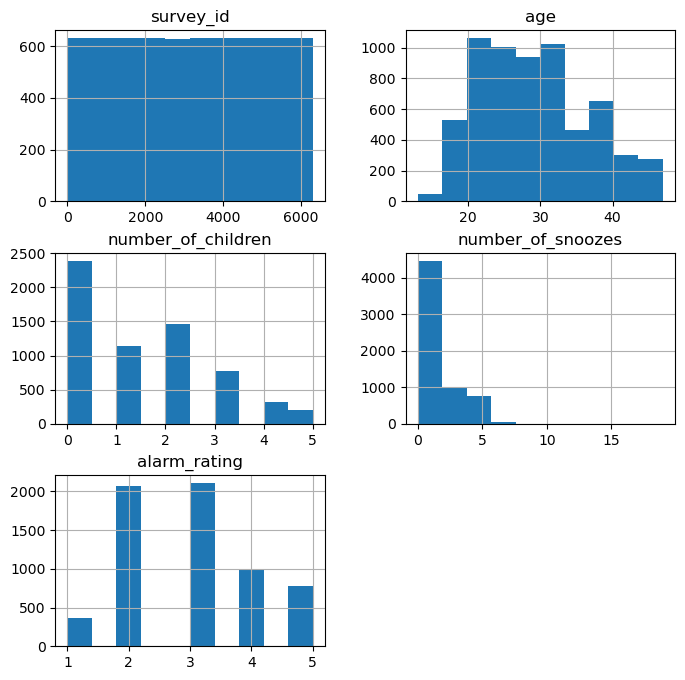

In [151]:
alarm_survey.hist(figsize = (8, 8));

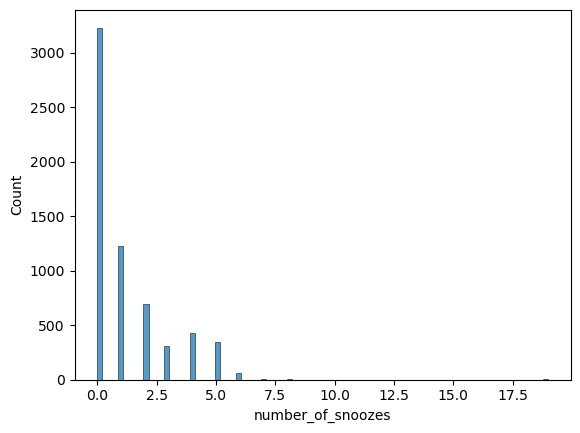

In [153]:
import seaborn as sns

sns.histplot(alarm_survey.number_of_snoozes);

<Axes: xlabel='number_of_snoozes'>

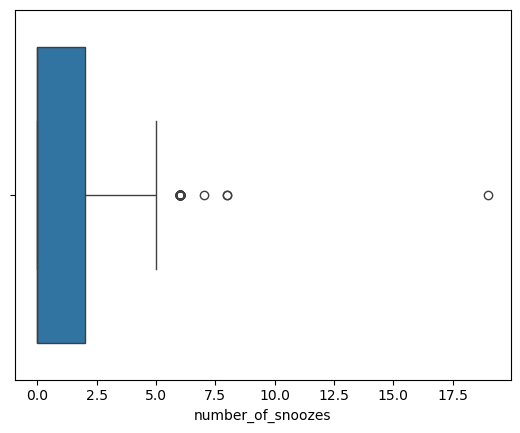

In [155]:
sns.boxplot(x = alarm_survey.number_of_snoozes)

In [157]:
alarm_survey.number_of_snoozes.value_counts()

number_of_snoozes
0     3233
1     1229
2      693
4      427
5      345
3      309
6       59
8        2
19       1
7        1
Name: count, dtype: int64

In [163]:
alarm_survey = alarm_survey[alarm_survey.number_of_snoozes < 19]

In [165]:
alarm_survey

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
0,1,34,3,active,3.0,1,5
1,2,31,3,lightly active,3.0,3,3
2,3,18,0,lightly active,4.0,1,1
3,4,42,4,active,4.0,1,4
4,5,30,1,lightly active,1.0,4,3
...,...,...,...,...,...,...,...
6294,6295,28,0,lightly active,4.0,0,5
6295,6296,22,0,active,5.0,0,3
6296,6297,45,5,active,5.0,0,3
6297,6298,47,4,active,5.0,0,3


## 6. Data Issues Check

* Quickly explore the updated DataFrame. How do things look now after handling the data issues compared to the original DataFrame?

In [167]:
## Missing Values

alarm_survey[alarm_survey.isna().any(axis=1)]

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating


In [169]:
## Inconsistent Text and Typos
alarm_survey.activity_level.value_counts()

activity_level
lightly active    3261
active            2394
very active        643
Name: count, dtype: int64

In [173]:
## Duplicate Data
alarm_survey[alarm_survey.duplicated()]

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating


In [177]:
## Outlier

alarm_survey.describe()

,survey_id,age,number_of_children,number_of_snoozes,alarm_rating
count,6298.000000,6298.000000,6298.000000,6298.000000,6298.000000
mean,3150.381073,29.083042,1.382185,1.167355,2.955383
std,1818.401853,7.481273,1.391065,1.591905,1.099357
min,1.000000,13.000000,0.000000,0.000000,1.000000
25%,1576.250000,23.000000,0.000000,0.000000,2.000000
50%,3150.500000,28.000000,1.000000,0.000000,3.000000
75%,4724.750000,34.000000,2.000000,2.000000,4.000000
max,6299.000000,47.000000,5.000000,8.000000,5.000000


## 7. Create Columns From Numeric Data

* Read data into Python
* Check the data type of each column
* Create a numeric column using arithmetic
* Create a numeric column using conditional logic

In [ ]:
# Create a “Total Spend” column that includes both the pen cost and shipping cost for each sale

In [187]:
import pandas as pd

pens = pd.read_excel(r"C:\Users\TAJ\Desktop\Python Data Prep and ETA\Data\Pen Sales Data.xlsx")

pens.head()

,Customer,Item,Pen Cost,Shipping Cost,Purchase Date,Delivery Date,Review
0,5201,Ballpoint Pens,5.99,2.99,2023-05-01,2023-05-03,"DoodleWithMe|I love the way this pen writes, b..."
1,5202,Sharpies,12.99,0.00,2023-05-01,2023-05-04,ScribbleMaster|The classic Sharpie marker has ...
2,5203,Ballpoint Pens (Bold),6.95,4.99,2023-05-01,2023-05-02,PenPalForever|The retractable ballpoint pen ha...
3,5204,Gel Pens,5.99,2.99,2023-05-01,2023-05-04,TheWriteWay|This gel pen has a comfortable gri...
4,5205,Rollerball Pens,12.99,1.99,2023-05-01,2023-05-03,PenAndPaperPerson|The rollerball pen has a smo...


In [181]:
pens.dtypes

Customer                  int64
Item                     object
Pen Cost                float64
Shipping Cost           float64
Purchase Date    datetime64[ns]
Delivery Date    datetime64[ns]
Review                   object
dtype: object

In [189]:
pens['Total Spent'] = pens['Pen Cost'] + pens['Shipping Cost']

In [191]:
pens.head()

,Customer,Item,Pen Cost,Shipping Cost,Purchase Date,Delivery Date,Review,Total Spent
0,5201,Ballpoint Pens,5.99,2.99,2023-05-01,2023-05-03,"DoodleWithMe|I love the way this pen writes, b...",8.98
1,5202,Sharpies,12.99,0.00,2023-05-01,2023-05-04,ScribbleMaster|The classic Sharpie marker has ...,12.99
2,5203,Ballpoint Pens (Bold),6.95,4.99,2023-05-01,2023-05-02,PenPalForever|The retractable ballpoint pen ha...,11.94
3,5204,Gel Pens,5.99,2.99,2023-05-01,2023-05-04,TheWriteWay|This gel pen has a comfortable gri...,8.98
4,5205,Rollerball Pens,12.99,1.99,2023-05-01,2023-05-03,PenAndPaperPerson|The rollerball pen has a smo...,14.98


In [ ]:
# Create a “Free Shipping” column that says yes if the sale included free shipping, and no otherwise

In [201]:
import numpy as np

pens['Free Shipping'] = np.where(pens['Shipping Cost'] == 0, 'Yes', 'No')

pens.head()

,Customer,Item,Pen Cost,Shipping Cost,Purchase Date,Delivery Date,Review,Total Spent,Free Shipping
0,5201,Ballpoint Pens,5.99,2.99,2023-05-01,2023-05-03,"DoodleWithMe|I love the way this pen writes, b...",8.98,No
1,5202,Sharpies,12.99,0.00,2023-05-01,2023-05-04,ScribbleMaster|The classic Sharpie marker has ...,12.99,Yes
2,5203,Ballpoint Pens (Bold),6.95,4.99,2023-05-01,2023-05-02,PenPalForever|The retractable ballpoint pen ha...,11.94,No
3,5204,Gel Pens,5.99,2.99,2023-05-01,2023-05-04,TheWriteWay|This gel pen has a comfortable gri...,8.98,No
4,5205,Rollerball Pens,12.99,1.99,2023-05-01,2023-05-03,PenAndPaperPerson|The rollerball pen has a smo...,14.98,No


## 8. Create Columns From DateTime Data

* Calculate the difference between two datetime columns and save it as a new column
* Take the average of a column

In [ ]:
# Calculate the number of days between the purchase and delivery date for each sale
# Save it as a new column called “Delivery Time”
# What were the average days from purchase to delivery?

In [207]:
pens['Delivery Time'] = pens['Delivery Date'] - pens['Purchase Date']

In [209]:
pens.head()

,Customer,Item,Pen Cost,Shipping Cost,Purchase Date,Delivery Date,Review,Total Spent,Free Shipping,Delivery Time
0,5201,Ballpoint Pens,5.99,2.99,2023-05-01,2023-05-03,"DoodleWithMe|I love the way this pen writes, b...",8.98,No,2 days
1,5202,Sharpies,12.99,0.00,2023-05-01,2023-05-04,ScribbleMaster|The classic Sharpie marker has ...,12.99,Yes,3 days
2,5203,Ballpoint Pens (Bold),6.95,4.99,2023-05-01,2023-05-02,PenPalForever|The retractable ballpoint pen ha...,11.94,No,1 days
3,5204,Gel Pens,5.99,2.99,2023-05-01,2023-05-04,TheWriteWay|This gel pen has a comfortable gri...,8.98,No,3 days
4,5205,Rollerball Pens,12.99,1.99,2023-05-01,2023-05-03,PenAndPaperPerson|The rollerball pen has a smo...,14.98,No,2 days


In [211]:
pens['Delivery Time'].mean()

Timedelta('3 days 05:45:36')

## 9. Create Columns From Text Data

* Split one column into multiple columns
* Create a Boolean column (True / False) to show whether a text field contains particular words

In [ ]:
# Split the reviews on the “|” character to create two new columns: “User Name” and “Review Text”
# Create a “Leak or Spill” column that flags the reviews that mention either “leak” or “spill”

In [213]:
pens[['User Name','Review Text']] = pd.DataFrame(pens.Review.str.split('|').to_list())

In [215]:
pens.head()

,Customer,Item,Pen Cost,Shipping Cost,Purchase Date,Delivery Date,Review,Total Spent,Free Shipping,Delivery Time,User Name,Review Text
0,5201,Ballpoint Pens,5.99,2.99,2023-05-01,2023-05-03,"DoodleWithMe|I love the way this pen writes, b...",8.98,No,2 days,DoodleWithMe,"I love the way this pen writes, but unfortunat..."
1,5202,Sharpies,12.99,0.00,2023-05-01,2023-05-04,ScribbleMaster|The classic Sharpie marker has ...,12.99,Yes,3 days,ScribbleMaster,"The classic Sharpie marker has a bold, permane..."
2,5203,Ballpoint Pens (Bold),6.95,4.99,2023-05-01,2023-05-02,PenPalForever|The retractable ballpoint pen ha...,11.94,No,1 days,PenPalForever,"The retractable ballpoint pen has a durable, m..."
3,5204,Gel Pens,5.99,2.99,2023-05-01,2023-05-04,TheWriteWay|This gel pen has a comfortable gri...,8.98,No,3 days,TheWriteWay,This gel pen has a comfortable grip and writes...
4,5205,Rollerball Pens,12.99,1.99,2023-05-01,2023-05-03,PenAndPaperPerson|The rollerball pen has a smo...,14.98,No,2 days,PenAndPaperPerson,"The rollerball pen has a smooth, fluid feel an..."


In [217]:
pens['Leak or Spill'] = pens.Review.str.contains('leak|spill', regex=True)

In [219]:
pens.head()

,Customer,Item,Pen Cost,Shipping Cost,Purchase Date,Delivery Date,Review,Total Spent,Free Shipping,Delivery Time,User Name,Review Text,Leak or Spill
0,5201,Ballpoint Pens,5.99,2.99,2023-05-01,2023-05-03,"DoodleWithMe|I love the way this pen writes, b...",8.98,No,2 days,DoodleWithMe,"I love the way this pen writes, but unfortunat...",True
1,5202,Sharpies,12.99,0.00,2023-05-01,2023-05-04,ScribbleMaster|The classic Sharpie marker has ...,12.99,Yes,3 days,ScribbleMaster,"The classic Sharpie marker has a bold, permane...",False
2,5203,Ballpoint Pens (Bold),6.95,4.99,2023-05-01,2023-05-02,PenPalForever|The retractable ballpoint pen ha...,11.94,No,1 days,PenPalForever,"The retractable ballpoint pen has a durable, m...",False
3,5204,Gel Pens,5.99,2.99,2023-05-01,2023-05-04,TheWriteWay|This gel pen has a comfortable gri...,8.98,No,3 days,TheWriteWay,This gel pen has a comfortable grip and writes...,False
4,5205,Rollerball Pens,12.99,1.99,2023-05-01,2023-05-03,PenAndPaperPerson|The rollerball pen has a smo...,14.98,No,2 days,PenAndPaperPerson,"The rollerball pen has a smooth, fluid feel an...",False
